# 2. hands-on session: ***Star vs Quasar*: Decision tree**

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc("font", size=15)

## **What does a good dataset look like?**

- enough data points
- not so much omitted data
- distinguishable features
- representative features
- good parameter-space coverage
- unbiased dataset

### **Enough data points**

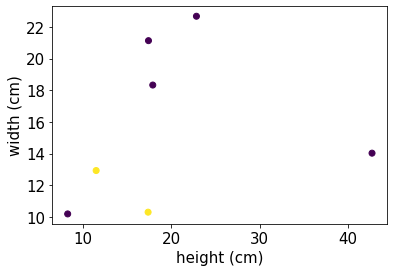

In [93]:
Ndog, Ncat = 5, 2

height = np.hstack((np.random.uniform(8, 50, size=Ndog), 
                    np.random.uniform(5, 20, size=Ncat)))

width = np.hstack((np.random.uniform(8, 25, size=Ndog), 
                    np.random.uniform(5, 16, size=Ncat)))

labels = Ndog*[0] + Ncat*[1]

plt.scatter(height, width, c=labels)
plt.xlabel("height (cm)")
plt.ylabel("width (cm)");

### **Not much omitted data**

,Height,Width,Species
0,37,16,Dog
1,23,19,Dog
2,13,16,Dog
3,42,10,Dog
4,46,16,Dog
...,...,...,...
65,26,14,Cat
66,5.6,12,Cat
67,16,9.5,Cat
68,27,12,Cat


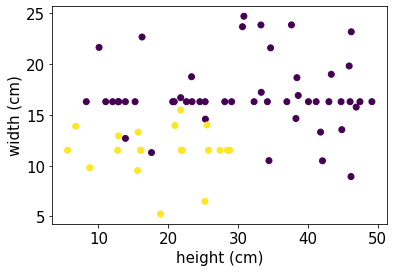

In [94]:
Ndog, Ncat = 50, 20

height = np.hstack((np.random.uniform(8, 50, size=Ndog), 
                    np.random.uniform(5, 30, size=Ncat)))

width = np.hstack((np.random.uniform(8, 25, size=Ndog), 
                    np.random.uniform(5, 16, size=Ncat)))

y = Ndog*["Dog"] + Ncat*["Cat"]
width[:Ndog][::2], width[Ndog:][::2] = np.mean(width[:Ndog]), np.mean(width[Ndog:])
labels = Ndog*[0] + Ncat*[1]

plt.scatter(height, width, c=labels)
plt.xlabel("height (cm)")
plt.ylabel("width (cm)")

pd.options.display.float_format = "{:,.2g}".format
pd.DataFrame({"Height" : height, "Width" : width, "Species" : y})

### **Distinguishable features**

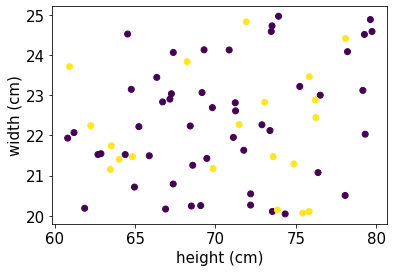

In [95]:
Nretriever, Ndobrman = 50, 20

height = np.hstack((np.random.uniform(60, 80, size=Nretriever), 
                    np.random.uniform(60, 80, size=Ndobrman)))

width = np.hstack((np.random.uniform(20, 25, size=Nretriever), 
                    np.random.uniform(20, 25, size=Ndobrman)))

y = Nretriever*["Retriever"] + Ndobrman*["Dobrman"]
labels = Nretriever*[0] + Ndobrman*[1]

plt.scatter(height, width, c=labels)
plt.xlabel("height (cm)")
plt.ylabel("width (cm)");

### **Representative features**

In [96]:
Ndog, Ncat = 50, 20

legs = np.hstack((np.ones(Ndog)*4,
                    np.ones(Ncat)*4))

tail = np.hstack(([True for i in range(Ndog)],
                    [True for i in range(Ncat)]))

y = Ndog*["Dog"] + Ncat*["Cat"]

pd.DataFrame({"Legs" : legs, "Tail" : tail, "Species" : y})

,Legs,Tail,Species
0,4,True,Dog
1,4,True,Dog
2,4,True,Dog
3,4,True,Dog
4,4,True,Dog
...,...,...,...
65,4,True,Cat
66,4,True,Cat
67,4,True,Cat
68,4,True,Cat


### **Good parameter-space coverage**

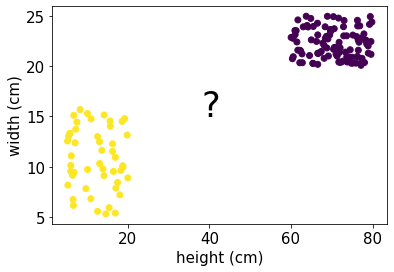

In [97]:
Ndog, Ncat = 100, 50

height = np.hstack((np.random.uniform(60, 80, size=Ndog), 
                    np.random.uniform(5, 20, size=Ncat)))

width = np.hstack((np.random.uniform(20, 25, size=Ndog), 
                    np.random.uniform(5, 16, size=Ncat)))

y = Ndog*["Dog"] + Ncat*["Cat"]
labels = Ndog*[0] + Ncat*[1]

plt.scatter(height, width, c=labels)

plt.text(38, 15, "?", size=35)

plt.xlabel("height (cm)")
plt.ylabel("width (cm)");

### **Selection bias**

,Height,Width,Species
0,32,21,Dog
1,63,27,Dog
2,63,29,Dog
3,18,26,Dog
4,69,24,Dog
...,...,...,...
65,9.7,12,Cat
66,14,5.9,Cat
67,22,15,Cat
68,29,10,Cat


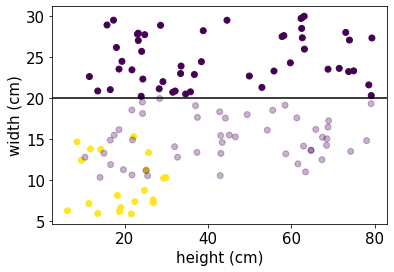

In [98]:
from matplotlib.colors import Normalize

Ndog, Ncat = 50, 20

height = np.hstack((np.random.uniform(10, 80, size=Ndog), 
                    np.random.uniform(5, 30, size=Ncat)))

width = np.hstack((np.random.uniform(20, 30, size=Ndog), 
                    np.random.uniform(5, 16, size=Ncat)))

y = Ndog*["Dog"] + Ncat*["Cat"]
labels = Ndog*[0] + Ncat*[1]

height_missed = np.random.uniform(10, 80, size=Ndog)
                
width_missed = np.random.uniform(10, 20, size=Ndog)

labels_missed = Ndog*[0]

plt.scatter(height, width, c=labels)
plt.scatter(height_missed, width_missed, c=labels_missed, alpha=0.3, norm=Normalize(0,1))
plt.axhline(20, color="k")
plt.xlabel("height (cm)")
plt.ylabel("width (cm)")

pd.options.display.float_format = "{:,.2g}".format
pd.DataFrame({"Height" : height, "Width" : width, "Species" : y})

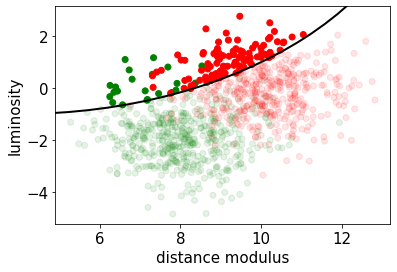

In [99]:
# generate data
dist1 = np.random.multivariate_normal([8, -2], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([10, 0], [[1, 0], [0, 1]], size=500)

# plot data
x0, y0, r = 4, 9, 10
opacities1 = np.where(np.sqrt((dist1[:,0]-x0)**2 + (dist1[:,1]-y0)**2) < r, 1, 0.1)
colors1 = np.ones((500,3)) * np.array([0, 128, 0]) / 255
colors1 = np.column_stack((colors1, opacities1))

opacities2 = np.where(np.sqrt((dist2[:,0]-x0)**2 + (dist2[:,1]-y0)**2) < r, 1, 0.1)
colors2 = np.ones((500,3)) * np.array([255, 0, 0]) / 255
colors2 = np.column_stack((colors2, opacities2))

fig, ax = plt.subplots()
ax.scatter(dist1[:, 0], dist1[:, 1], c=colors1)
ax.scatter(dist2[:, 0], dist2[:, 1], c=colors2);

circle = plt.Circle((x0, y0), r, color="black", fill=False, lw=2)
ax.add_artist(circle);

ax.set_xlabel("distance modulus")
ax.set_ylabel("luminosity");

#### **Example: Hot Jupiters**


<img src="https://drive.google.com/uc?export=view&id=1720xkETMsQiIKJU0QFtOZ0LTGUqHNFQJ" width="550px" align="left">

### **Ideal dataset**

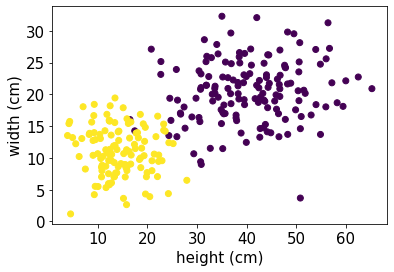

In [100]:
Ndog, Ncat = 150, 120

height = np.hstack((np.random.normal(40, 10, size=Ndog), 
                    np.random.normal(15, 5, size=Ncat)))

width = np.hstack((np.random.normal(20, 5, size=Ndog), 
                    np.random.normal(12, 4, size=Ncat)))

y = Ndog*["Dog"] + Ncat*["Cat"]
labels = Ndog*[0] + Ncat*[1]

plt.scatter(height, width, c=labels)
plt.xlabel("height (cm)")
plt.ylabel("width (cm)");

## **Where can you get a real dataset?**

### **General**

- [Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
- [Keras](https://keras.io/api/datasets/)
- [Kaggle](https://www.kaggle.com/)
- Internet: Photobanks, Weather, Stocks, Bitcoin


### **Scikit-learn Datasets**

#### **Iris (kosatec)**

<br>

![](https://www.aifunded.es/images/iris.png)

<br>

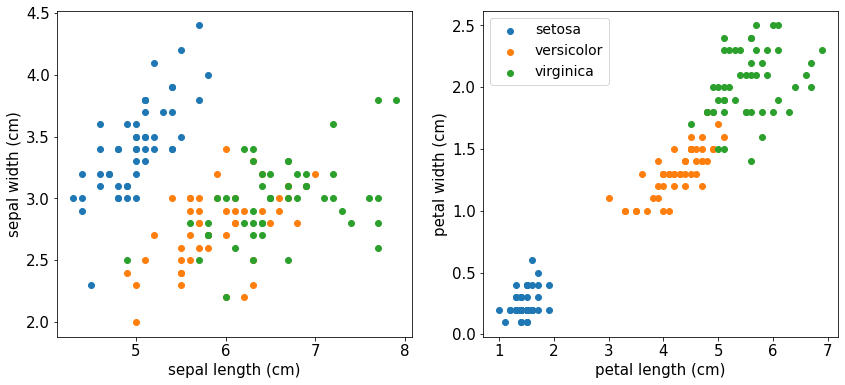

In [101]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris["data"], iris["target"]
classes, features = iris["target_names"], iris["feature_names"]

i1, i2, i3 = y == 0, y == 1, y == 2

plt.figure(figsize=(14,6))

plt.subplot(121)
plt.scatter(X[:,0][i1], X[:,1][i1])
plt.scatter(X[:,0][i2], X[:,1][i2])
plt.scatter(X[:,0][i3], X[:,1][i3])
plt.xlabel(features[0])
plt.ylabel(features[1])

plt.subplot(122)
plt.scatter(X[:,2][i1], X[:,3][i1], label=classes[0])
plt.scatter(X[:,2][i2], X[:,3][i2], label=classes[1])
plt.scatter(X[:,2][i3], X[:,3][i3], label=classes[2])
plt.xlabel(features[2])
plt.ylabel(features[3])

plt.legend(fontsize=14);

#### **[Clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)**

<br>

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" align=left width=950>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### **California housing dataset**

In [102]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data["data"], columns=data['feature_names'])
X["MedHouseVal"] = data["target"]

pd.reset_option("display.float_format")
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


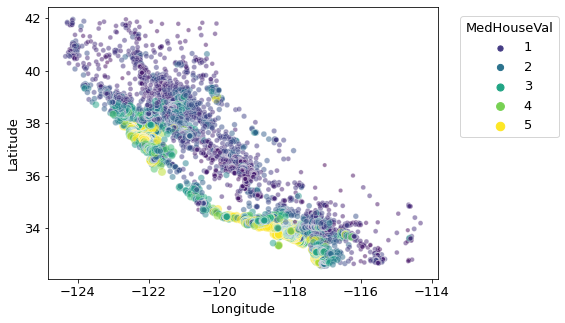

In [103]:
import seaborn as sns

plt.figure(figsize=(7,5))
plt.rc("font", size=13)
sns.scatterplot(data=X, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.04, 0.99), loc="upper left");

#### **Digits**

(1797, 8, 8)


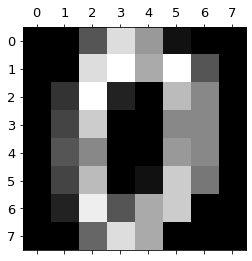

In [104]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.images.shape)

plt.matshow(digits.images[0], cmap="gray")

plt.show()

### **Keras Datasets (e.g. MNIST or FASHION MNIST)**

(60000, 28, 28)

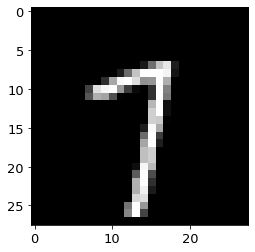

In [105]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

plt.imshow(x_train[42], cmap="gray");
x_train.shape

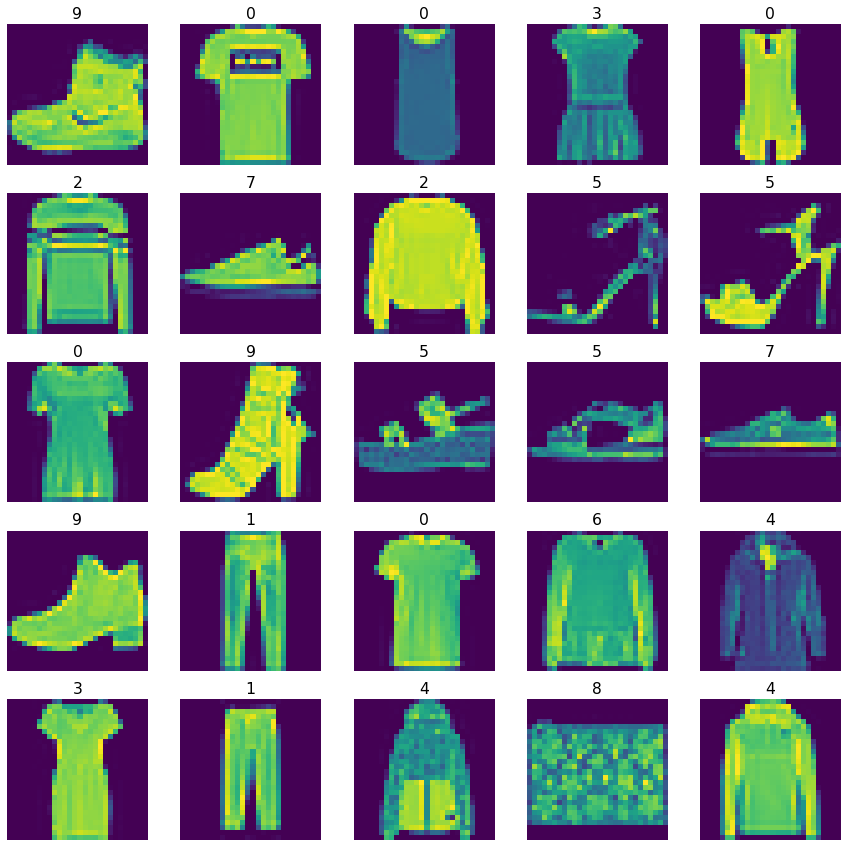

In [106]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

fig, axs = plt.subplots(5, 5, figsize=(15,15))

x = 0
for i in range(5):
    for j in range(5):
        axs[i,j].set_title(y_train[x])
        axs[i,j].imshow(x_train[x])
        axs[i,j].axis("off")
        x += 1

### **Astronomical datasets**

- [AstroML](https://www.astroml.org/user_guide/datasets.html) (SDSS photometry, spectroscopy, light curves)
- variable stars
- GRB detection
- galaxy classification ([Galaxy10](https://astronn.readthedocs.io/en/latest/#), [Galaxy Zoo](https://www.kaggle.com/competitions/galaxy-zoo-the-galaxy-challenge/data))

#### **SDSS spectra**

In [107]:
!pip install astroML
import astroML.datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


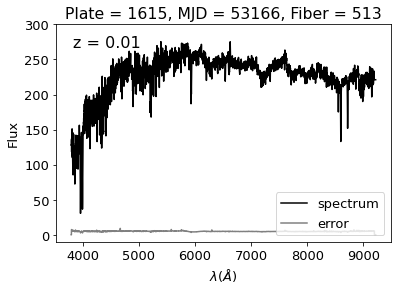

In [108]:
# Fetch single spectrum
plate = 1615
mjd = 53166
fiber = 513

spec = astroML.datasets.fetch_sdss_spectrum(plate, mjd, fiber)

#------------------------------------------------------------
# Plot the resulting spectrum
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

ax.legend(loc=4)

ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

ax.set_ylim(-10, 300)

plt.show()

#### **RR Lyrae**

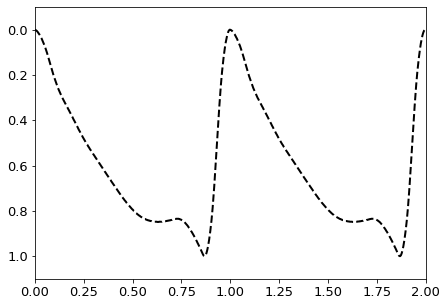

In [109]:
templates = astroML.datasets.fetch_rrlyrae_templates()
x, y = templates['115r'].T

#------------------------------------------------------------
# Plot the results
fig, ax = plt.subplots(figsize=(7, 5))

# plot the true value and the k-term reconstruction
ax.plot(np.concatenate([x, 1 + x]),
        np.concatenate([y, y]), '--k', lw=2)

ax.set_xlim(0, 2)
ax.set_ylim(1.1, -0.1);

#### **Galaxy10**

In [110]:
! pip install astroNN
from astroNN.datasets import load_galaxy10

(X, y) = load_galaxy10()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/root/.astroNN/datasets/Galaxy10.h5 was found!


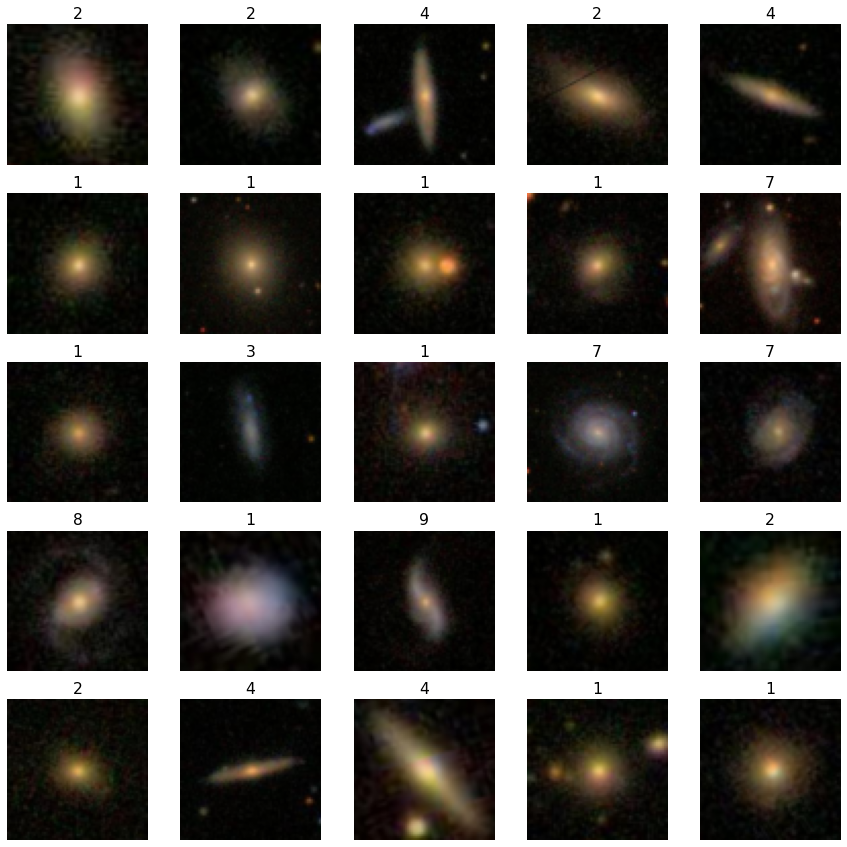

In [111]:
fig, axs = plt.subplots(5,5, figsize=(15,15))

n = 0
for i in range(5):
    for j in range(5):
        axs[i,j].set_title(y[n])
        axs[i,j].imshow(X[n])
        axs[i,j].axis("off")
        n += 1

## **Intro to pandas DataFrame**

In [112]:
data = np.array([[1,1,1],
                 [1,2,2],
                 [3,3,3],
                 [4,4,4]]).T

columns = ["ones", "twos", "threes", "fours"]
rows = ["first", "second", "third"]

df = pd.DataFrame(data=data, columns=columns) #, index=rows)
df

,ones,twos,threes,fours
0,1,1,3,4
1,1,2,3,4
2,1,2,3,4


In [113]:
df = pd.read_csv("sample_data/california_housing_train.csv")

In [114]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [115]:
df["longitude"]

0       -114.31
1       -114.47
2       -114.56
3       -114.57
4       -114.57
          ...  
16995   -124.26
16996   -124.27
16997   -124.30
16998   -124.30
16999   -124.35
Name: longitude, Length: 17000, dtype: float64

In [116]:
df.longitude

0       -114.31
1       -114.47
2       -114.56
3       -114.57
4       -114.57
          ...  
16995   -124.26
16996   -124.27
16997   -124.30
16998   -124.30
16999   -124.35
Name: longitude, Length: 17000, dtype: float64

In [117]:
df.longitude.loc[0]

-114.31

In [118]:
df.longitude.loc[[0,1]]

0   -114.31
1   -114.47
Name: longitude, dtype: float64

In [119]:
df.longitude.loc[df.longitude > -120]

0       -114.31
1       -114.47
2       -114.56
3       -114.57
4       -114.57
          ...  
10256   -119.99
10257   -119.99
10258   -119.99
10259   -119.99
10260   -119.99
Name: longitude, Length: 10261, dtype: float64

In [120]:
df.longitude.loc[df.latitude > 35]

119     -115.93
157     -116.22
264     -116.57
568     -117.02
1863    -117.28
          ...  
16995   -124.26
16996   -124.27
16997   -124.30
16998   -124.30
16999   -124.35
Name: longitude, Length: 7661, dtype: float64

In [121]:
df[["longitude", "longitude"]]

,longitude,longitude
0,-114.31,-114.31
1,-114.47,-114.47
2,-114.56,-114.56
3,-114.57,-114.57
4,-114.57,-114.57
...,...,...
16995,-124.26,-124.26
16996,-124.27,-124.27
16997,-124.30,-124.30
16998,-124.30,-124.30


In [122]:
cols = list(df.columns)
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [123]:
df[cols[:4]]

,longitude,latitude,housing_median_age,total_rooms
0,-114.31,34.19,15.0,5612.0
1,-114.47,34.40,19.0,7650.0
2,-114.56,33.69,17.0,720.0
3,-114.57,33.64,14.0,1501.0
4,-114.57,33.57,20.0,1454.0
...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0
16996,-124.27,40.69,36.0,2349.0
16997,-124.30,41.84,17.0,2677.0
16998,-124.30,41.80,19.0,2672.0


In [124]:
df["new"] = df["longitude"] - df["latitude"]
df["new"]

0       -148.50
1       -148.87
2       -148.25
3       -148.21
4       -148.14
          ...  
16995   -164.84
16996   -164.96
16997   -166.14
16998   -166.10
16999   -164.89
Name: new, Length: 17000, dtype: float64

In [125]:
df["longitude"].mean(), df["longitude"].std()

(-119.5621082352941, 2.0051664084261778)

## ***Star vs QSO***

<img src="https://cdn.mos.cms.futurecdn.net/HgaCHZDNppE6e52yeDACo6-970-80.jpg.webp" align=left width=400> 
<img src="https://earthsky.org/upl/2021/01/supermassive-black-hole-artist-e1610556964639.jpg" align=right width=400>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


# **Sloan Digital Sky Survey (SDSS)**

- photometry & spectroscopy

- fotometry 1 billion objects

- spectroscopy 6 million objects

- stars from our galaxy

- galaxies up to $z \approx 0.7$

- quasars up to $z \approx 6$

- color system `u g r i z`

<img src="https://www.astroml.org/_images/fig_sdss_filters_1.png" align=left width=500>

Spektrum hvězd a kvazarů se často podstatně liší. Zatímco u hvězd v naprosté většině pozorujeme hlavně absorpční čáry, u kvazarů můžeme vidět často velmi silné a silně rozšířené emisní čáry. I celkový tvar spektra se velmi liší - zatímco u hvězd docela dobře připomíná záření absolutně černého tělesa, jen s čarami a možná nějakým balmerovým skokem, u kvazarů často vidíme přebytek emise a to hlavně v ultrafialové části spektra.

Při pohledu na jednotlivá spektra bychom tyto dva objekty od sebe tedy velmi jednoduše rozeznali - avšak spektroskopie je velmi drahá a náročná - a například přehlídka SDSS pozoruje i hvězdy o hvězdných velikostech bližících se 20. magnitudě. Na největším dalekohledu v České republice, který je v Ondřejově, lze pozorovat spektra do asi 12. magnitudy.

Budeme si tedy muset vystačit s výřezy z těchto spekter v podobě barevný filtrů. Přehlídka SDSS využívá systém UGRIZ, měří tedy od blízké UV do blízké IR a tuto oblast rozdělí do 5 filtrů (U G R I Z).

In [126]:
!wget -c "https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB" -O "sdss_photo.csv"

--2022-10-03 13:55:14--  https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB
Resolving drive.google.com (drive.google.com)... 142.251.8.113, 142.251.8.100, 142.251.8.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.113|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



### **task 1:** load the data from `sdss_photo.csv` and examine them (mean, std, how many stars/QSOs)

In [127]:
data = pd.read_csv("sdss_photo.csv")

In [128]:
data

,u,g,r,i,z,target
0,19.240999,17.525999,16.840000,16.613001,16.492001,star
1,19.732000,18.339001,17.767000,17.580000,17.481001,star
2,16.120001,15.232000,14.933000,14.845000,14.827000,star
3,18.995001,18.150999,17.877001,17.747000,17.766001,star
4,19.032000,18.112000,17.848000,17.709999,17.712000,star
...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,QSO
863,26.433001,21.429001,20.261000,20.108000,20.073000,QSO
864,20.535999,20.200001,20.292999,19.910000,19.726000,QSO
865,20.627001,20.583000,20.270000,20.229000,20.190001,QSO


In [129]:
data.describe()

,u,g,r,i,z
count,867.000000,867.000000,867.000000,867.000000,867.000000
mean,19.288647,18.172607,17.717494,17.538743,17.452930
std,1.389292,1.334739,1.354759,1.370631,1.379087
min,15.669000,14.361000,14.124000,13.955000,13.887000
25%,18.501000,17.291500,16.740001,16.535500,16.446500
50%,19.329000,18.334000,17.877001,17.687000,17.622999
75%,20.024000,19.091000,18.759000,18.610000,18.521000
max,26.433001,25.165001,21.135000,20.716999,20.914000


In [130]:
sum((data.target == "star").astype(int)), sum((data.target == "QSO").astype(int))

(655, 212)

### **task 2:** divide the data into two groups (stars & QSOs) and compare them graphically (e.g. histogram)

In [131]:
filters = ["u", "g", "r", "i", "z"]

#QSOs, stars = [], []
#for i in range(len(data.target)):
#    if data.target[i] == "star":
#        stars.append(data[filters].loc[i])
    
#    elif data.target[i] == "QSO":
#        QSOs.append(data[filters].loc[i])
        
#QSOs = pd.DataFrame(data=QSOs, columns=filters)
#stars = pd.DataFrame(data=stars, columns=filters)

In [132]:
QSOs = data[filters].loc[data.target == "QSO"]
stars = data[filters].loc[data.target == "star"]

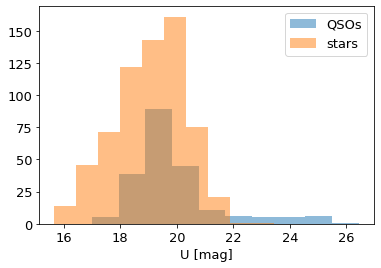

In [133]:
plt.hist(QSOs.u, alpha=0.5, label="QSOs")
plt.hist(stars.u, alpha=0.5, label="stars")
plt.legend()
plt.xlabel("U [mag]");

Kvazary můžeme ve filtru U pozorovat skoro až do 26. magnitudy, zatímco u hvězd končíme na přibližně 22. magnitudě.

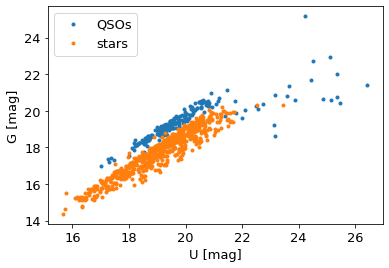

In [134]:
plt.plot(QSOs.u, QSOs.g, ".", label="QSOs")
plt.plot(stars.u, stars.g, ".", label="stars")
plt.legend()
plt.xlabel("U [mag]")
plt.ylabel("G [mag]");

Při dané hvězdné velikosti ve filtru U, mají kvazary přibližně o půl až magnitudu nižší hvězdnou velikost ve filtru G, což značí o přebytku v UV oblasti spektra.

Podíváme se tedy na histogramy všech filtrů a všechny možné dvojkombinace filtrů.

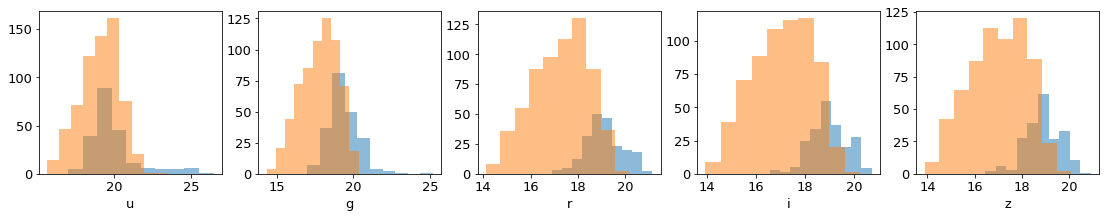

In [135]:
plt.figure(figsize=(19,3))
for i,f in enumerate(filters):
    plt.subplot(1,5,i+1)
    plt.hist(QSOs[f], alpha=0.5)
    plt.hist(stars[f], alpha=0.5)
    plt.xlabel(f)

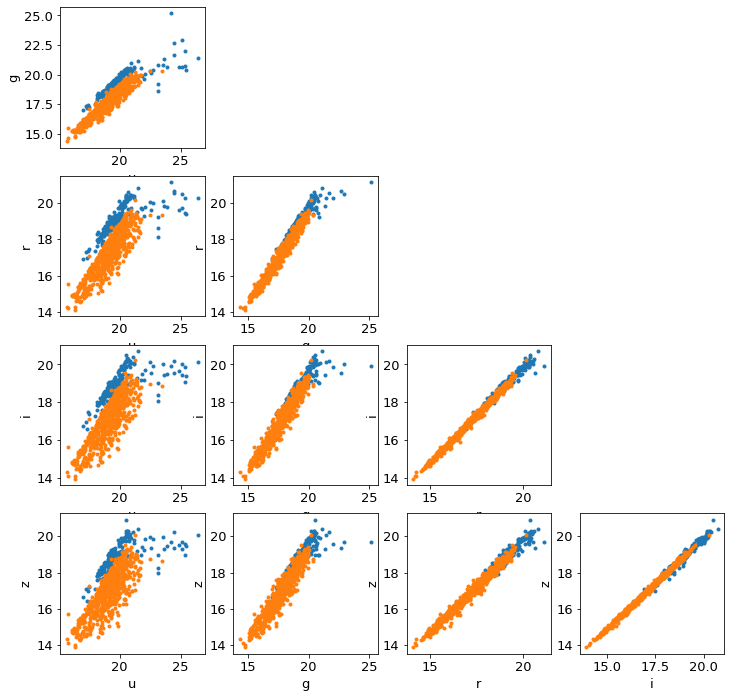

In [136]:
plt.figure(figsize=(15,15))

x = 0
for i in range(5):
    for j in range(5):
        x += 1
        if i == j: continue
        elif i < j: continue
        
        f1 = filters[i]
        f2 = filters[j]
        
        plt.subplot(5,5,x)
        
        plt.plot(QSOs[f2], QSOs[f1], ".")
        plt.plot(stars[f2], stars[f1], ".")
        plt.xlabel(f2)
        plt.ylabel(f1)

Naším úkolem bude pokusit se najít nějaké obecné pravidlo, podle kterého můžeme, na základě znalosti magnitud v těchto filtrech, jednoduše rozhodnout zda se jedná o hvězdy nebo o kvazi-stelární objekt.

K dispozici teď máme vlastně tuto sadu dat, u nichž to rozdělení známe - víme co je hvězda a co je QSO. A potřebujeme tu podmínku napsat tak obecně, aby, až naměříme nějaký nový objekt a nebudeme si jistí jestli je to hvězda nebo quasar, tak jsme to na základně naší podmínky schopni to jednoduše určit.

### **task 3:** pick a filter / combination of filters and write conditions that best divides the two groups

example:

`r > 19.5` &rarr; QSO

`z < 17.5` &rarr; star

```python
guess = []
for i in range(len(data.u)):
    if data.r[i] > 19.5:
        guess.append("QSO")
    else:
        guess.append("star")
```

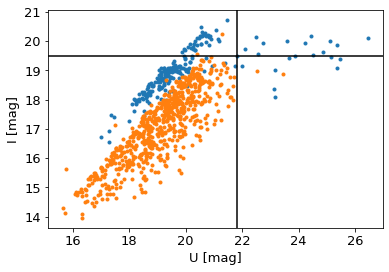

In [137]:
plt.plot(QSOs.u, QSOs.i, ".")
plt.plot(stars.u, stars.i, ".")
plt.xlabel("U [mag]")
plt.ylabel("I [mag]");

plt.axhline(19.5, color="black")
plt.axvline(21.8, color="black")

In [138]:
guess = []
for i in range(len(data.u)):
    if data.i[i] > 19.5 or data.u[i] > 21.8:
        guess.append("QSO")
    else:
        guess.append("star")

### **task 4:** estimate how many datapoints were guessed correctly

hint: compare array `guess` with column `data["target"]`

In [139]:
N = len(data.target)
correct = sum((guess == data.target).astype(int))

N, correct, correct / N * 100

(867, 710, 81.89158016147636)

Takže nám to ukazuje, že máme přibližně 82% úspěšnost, to není tak špatné že? 

No vzhledem k tomu, že nemáme 50% hvězd a 50% kvazarů, tak to vlastně není nic moc. Jelikož 75% našeho samplu tvoří hvězdy, tak kdybychom o všem řekli, že je to hvězda, tak budeme mít úspěšnost 75%. Takže správně bychom určili vlastně asi jen 1/3 kvazarů. My ale chceme hledat kvazary.

In [140]:
len(QSOs.u), len(stars.u)

(212, 655)

In [141]:
len(stars.u) / N * 100

75.54786620530565

In [142]:
correct_QSO = sum(((guess == data.target) & (data.target == "QSO")).astype(int))
len(QSOs.u), correct_QSO, correct_QSO / len(QSOs.u) * 100

(212, 59, 27.830188679245282)

In [143]:
correct_star = sum(((guess == data.target) & (data.target == "star")).astype(int))
len(stars.u), correct_star, correct_star / len(stars.u) * 100

(655, 651, 99.38931297709924)

### **task 5:** compute color indices from neighbouring filters and plot them

In [144]:
QSOs["u-g"] = QSOs.u - QSOs.g
QSOs["g-r"] = QSOs.g - QSOs.r
QSOs["r-i"] = QSOs.r - QSOs.i
QSOs["i-z"] = QSOs.i - QSOs.z

stars["u-g"] = stars.u - stars.g
stars["g-r"] = stars.g - stars.r
stars["r-i"] = stars.r - stars.i
stars["i-z"] = stars.i - stars.z

In [145]:
QSOs

,u,g,r,i,z,u-g,g-r,r-i,i-z
655,20.242001,20.205999,19.941000,19.485001,19.177999,0.036001,0.264999,0.455999,0.307001
656,17.274000,17.372000,17.285000,16.929001,17.108999,-0.098000,0.087000,0.355999,-0.179998
657,23.659000,21.349001,19.834999,19.419001,19.308001,2.309999,1.514002,0.415998,0.111000
658,19.945999,20.077999,20.096001,19.728001,19.586000,-0.132000,-0.018002,0.368000,0.142000
659,19.006001,19.087999,18.951000,18.594999,18.431000,-0.081999,0.136999,0.356001,0.164000
...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,0.199999,0.384001,0.035999,-0.043999
863,26.433001,21.429001,20.261000,20.108000,20.073000,5.004000,1.168001,0.153000,0.035000
864,20.535999,20.200001,20.292999,19.910000,19.726000,0.335999,-0.092999,0.382999,0.184000
865,20.627001,20.583000,20.270000,20.229000,20.190001,0.044001,0.313000,0.041000,0.039000


In [146]:
stars

,u,g,r,i,z,u-g,g-r,r-i,i-z
0,19.240999,17.525999,16.840000,16.613001,16.492001,1.715000,0.685999,0.226999,0.121000
1,19.732000,18.339001,17.767000,17.580000,17.481001,1.393000,0.572001,0.187000,0.098999
2,16.120001,15.232000,14.933000,14.845000,14.827000,0.888000,0.299001,0.087999,0.018001
3,18.995001,18.150999,17.877001,17.747000,17.766001,0.844002,0.273998,0.130001,-0.019001
4,19.032000,18.112000,17.848000,17.709999,17.712000,0.920000,0.264000,0.138000,-0.002001
...,...,...,...,...,...,...,...,...,...
650,20.257999,18.625000,17.923000,17.673000,17.523001,1.632999,0.702000,0.250000,0.150000
651,19.906000,18.627001,18.009001,17.780001,17.649000,1.278999,0.618000,0.229000,0.131001
652,19.400000,18.301001,17.840000,17.670000,17.629999,1.098999,0.461000,0.170000,0.040001
653,20.471001,19.514999,19.216000,19.066000,19.104000,0.956001,0.299000,0.150000,-0.038000


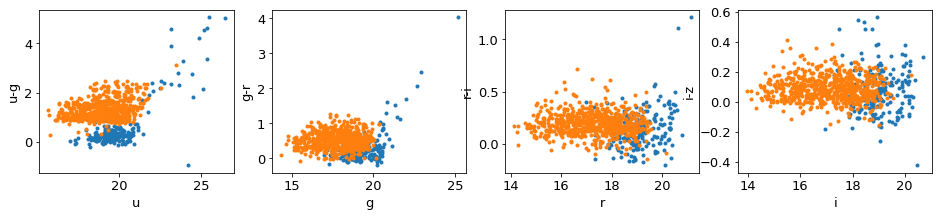

In [147]:
plt.figure(figsize=(16,3))
for i in range(4):
    index = filters[i]+"-"+filters[i+1]

    plt.subplot(1,4,i+1)
    plt.plot(QSOs[filters[i]], QSOs[index], ".")
    plt.plot(stars[filters[i]], stars[index], ".")

    plt.xlabel(filters[i])
    plt.ylabel(index)

### **task 6:** pick color index and write conditions to divide the groups

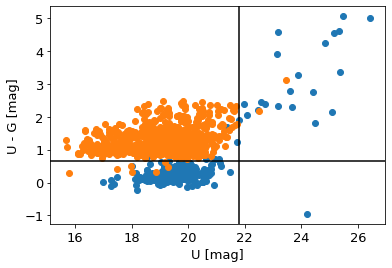

In [148]:
plt.plot(QSOs.u, QSOs["u-g"], "o")
plt.plot(stars.u, stars["u-g"], "o");

plt.axhline(0.65, color="black")
plt.axvline(21.8, color="black")
plt.xlabel("U [mag]")
plt.ylabel("U - G [mag]");

In [149]:
guess = []
for u, g, t in zip(data.u, data.g, data.target):
    if u - g < 0.65 or u > 21.8:
        guess.append("QSO")
    else:
        guess.append("star")

In [150]:
N = len(data.target)
wrong = N - sum((guess == data.target).astype(int))
N, wrong, (1 - wrong / N) * 100

(867, 18, 97.92387543252595)

In [151]:
correct_QSO = sum(((guess == data.target) & (data.target == "QSO")).astype(int))
len(QSOs.u), correct_QSO, correct_QSO / len(QSOs.u) * 100

(212, 203, 95.75471698113208)

In [152]:
correct_star = sum(((guess == data.target) & (data.target == "star")).astype(int))
len(stars.u), correct_star, correct_star / len(stars.u) * 100

(655, 646, 98.62595419847328)

Mohli bysme zase přidávat nové podmínky až bysme se dostali ke skoro 100% úspěšnosti

Když se udělá nová přehlídka co bude měřit ještě slabší hvězdy s magnitudou větší než 22, tak se nám ty naše podmínky rázem sesypou a nebudou nám dávat dobrý předpovědi. U takového modelu prostě nemůžeme říct, že by byl dostatečně obecný.

Na začátek je potřeba naše data trochu předělat do formátu, kterému bude náš počítač trochu lépe rozumět. Počítač neví co je to anglické slovo star a zkrakta QSO - mohl by si vytvořit nějakou číselnou reprezentaci těchto stringů, ale proč mu to komplikovat. Použijme prostě 0 pro QSO a 1 pro star.

### **task 7:** create `X` a `y` variables

hint:

use original dataframe `data`

u, u-g  &rarr;  `X`

`y`:  $\,$QSO &rarr; 0\
&nbsp; &nbsp; &nbsp; &nbsp; star &rarr; 1

In [153]:
X = data[["u", "g"]].copy()
X["u-g"] = X.u - X.g

X = X[["u", "u-g"]]
X

,u,u-g
0,19.240999,1.715000
1,19.732000,1.393000
2,16.120001,0.888000
3,18.995001,0.844002
4,19.032000,0.920000
...,...,...
862,19.247000,0.199999
863,26.433001,5.004000
864,20.535999,0.335999
865,20.627001,0.044001


In [154]:
target = data["target"]

y = []
for t in target:
    if t == "QSO":
        y.append(0)

    elif t == "star":
        y.append(1)
        
y = np.array(y)

In [155]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### **task 8:** for scikit-learn import `DecisionTreeClassifier` and use its `fit()` method

<img src="https://www.researchgate.net/profile/Amir-Akbari-19/publication/348456545/figure/fig1/AS:981743439994883@1611077284634/Schematic-of-a-Decision-Tree-The-figure-shows-an-example-of-a-decision-tree-with-3.png" width=400>

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
clf = DecisionTreeClassifier()

clf.fit(X, y)

DecisionTreeClassifier()

### **task 9:** use method predict on the `X` variable and compare the output to `y`

In [158]:
guess = clf.predict(X)

In [159]:
N = len(y)
correct = sum((guess == y).astype(int))
N, correct, correct / N * 100

(867, 867, 100.0)

## **Decision surface**

In [160]:
size = 100

range_U = np.linspace(min(stars.u), max(QSOs.u), size)
range_UG = np.linspace(min(QSOs["u-g"]), max(QSOs["u-g"]), size)
U, UG = np.meshgrid(range_U, range_UG)

In [161]:
grid = np.vstack((U.flatten(), UG.flatten())).T

In [162]:
predicted = clf.predict(grid)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [163]:
predicted = predicted.reshape(size,size)

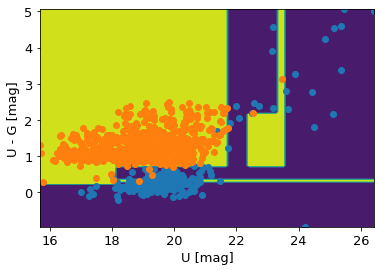

In [164]:
plt.contourf(U, UG, predicted)

plt.plot(QSOs.u, QSOs["u-g"], "o")
plt.plot(stars.u, stars["u-g"], "o");

#plt.axhline(0.65, color="black")
#plt.axvline(21.8, color="black")

plt.xlabel("U [mag]")
plt.ylabel("U - G [mag]");

## **Is that a good model?**

V principu, pokud nebudou mít nějaká hvězda a QSO stejné hodnoty všech 5 parametrů, tak můžete vždycky najít takovou sadu podmínek - jinak řečeno takový model, kterou vám zajístí 100% úspěšnost. 

Takovému jevu, když máte velmi komplexní model a dostanete 100% úspěšnost na tréninkových datech, se v Machine learningu říká overfitování. Je potřeba si však uvědomit, že naším cílem není dokonale rozdělit tuhle "trénovací" sadu dat, u nichž tu "pravdu" už známe. Naším cílem je vytvořit dostatečně obecný model, který bude mít co nejlepší úspěšnost pří použití na data, která jsme ještě nikdy neviděli.

Když pomineme, že by mohli přibýt slabší hvězdy, ale vezmeme v potaz jen, že bychom semtam nějakou hvězdu vynechali při učení a pak to na ní otestovali, tak je velká šance, že z těch dat při tom testování vytáhneme takové pro které ten model nebude moc sedět. A přesně takhle se v Machine Learningu vlastně modely testují. Část dat, které máme si dáme stranou, třeba 10%. Vytrénujeme síť na 90% dat a pak ji na 10% otestujeme. Pojďme si to vyzkoušet.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1024px-Overfitting.svg.png" align=left width=500>

### **task 10:** split the data in the 9:1 ratio, train on 90% and test on 10% of data

hint: use can use `train_test_split`

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, shuffle=True)

In [167]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,

In [168]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [169]:
clf.score(X_test, y_test)

0.9400921658986175

In [170]:
from sklearn.metrics import ConfusionMatrixDisplay

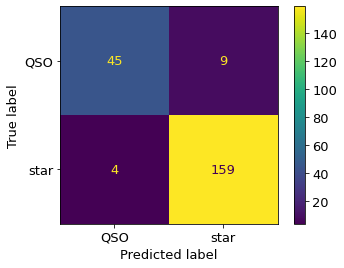

In [171]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["QSO", "star"]);

## **Decision tree visualization**

In [172]:
from sklearn.tree import plot_tree

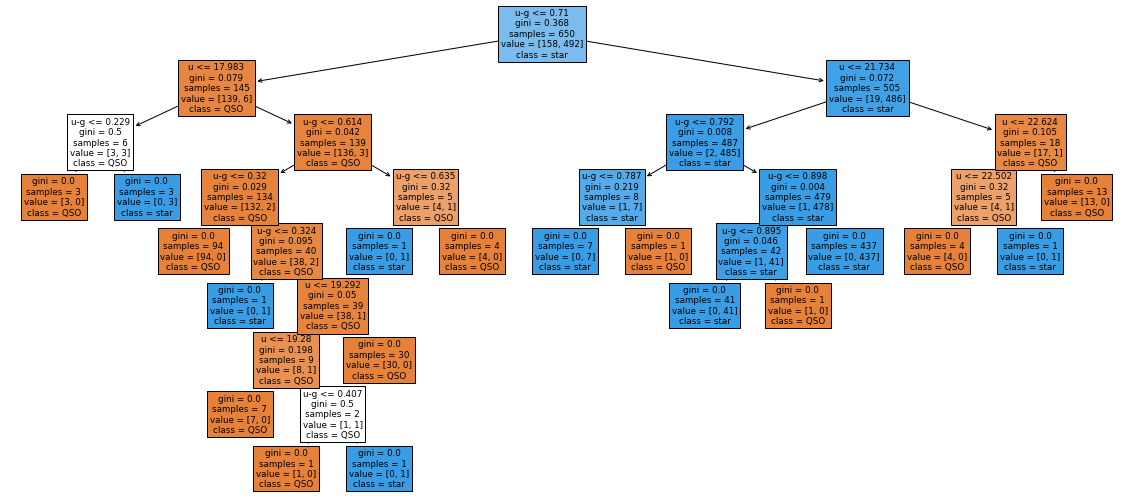

In [173]:
fig, ax = plt.subplots(figsize=(20,9))
plot_tree(clf, 
          feature_names=X.columns,
          class_names=["QSO", "star"],
          filled=True, 
          ax=ax);

In [174]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


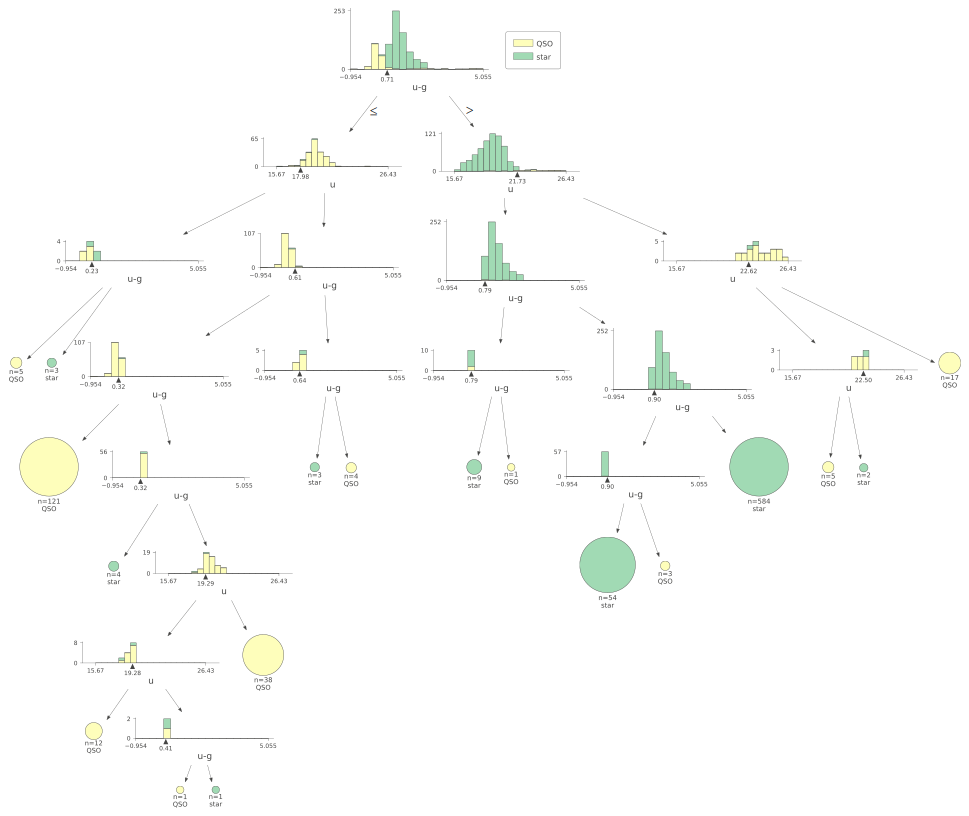

In [175]:
viz = dtreeviz(clf, X, y,
               feature_names=X.columns,
               class_names=["QSO", "star"])

viz

### **task 11:** import `RandomForestClassifier` and repeat tasks 8 & 9

![](https://miro.medium.com/max/1200/1*hmtbIgxoflflJqMJ_UHwXw.jpeg)

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
rf = RandomForestClassifier(n_estimators=10)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [178]:
rf.score(X_test, y_test)

0.9769585253456221

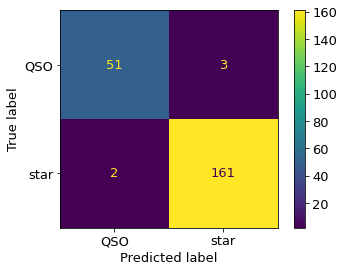

In [179]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=["QSO", "star"]);

In [180]:
len(rf.estimators_)

10

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


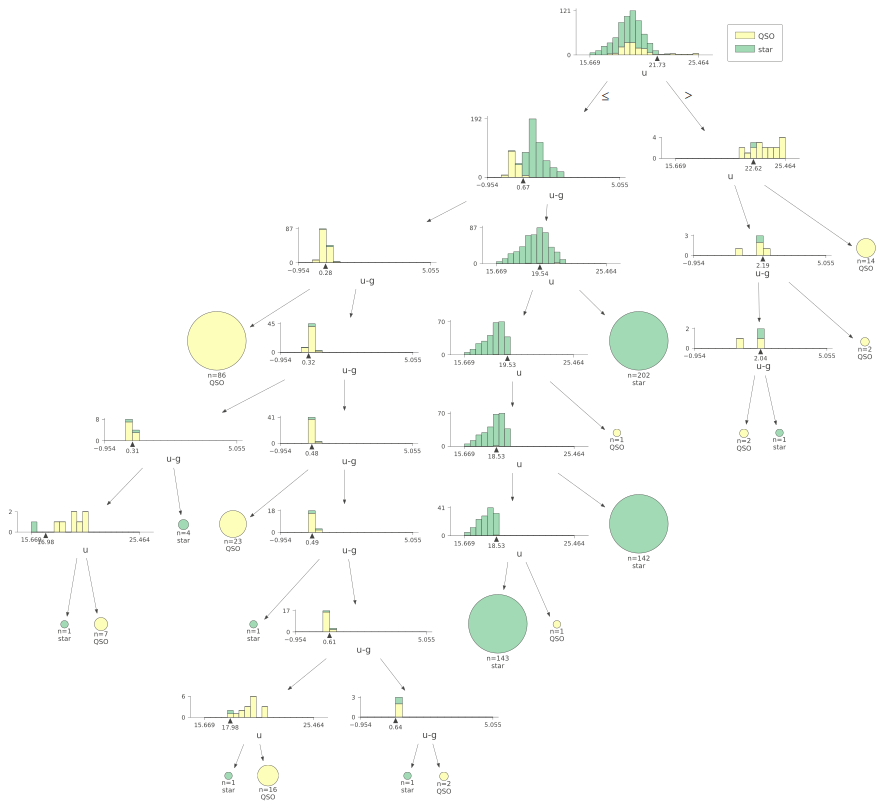

In [181]:
viz = dtreeviz(rf.estimators_[0], X_train, y_train,
               feature_names=X.columns,
               class_names=["QSO", "star"])

viz

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


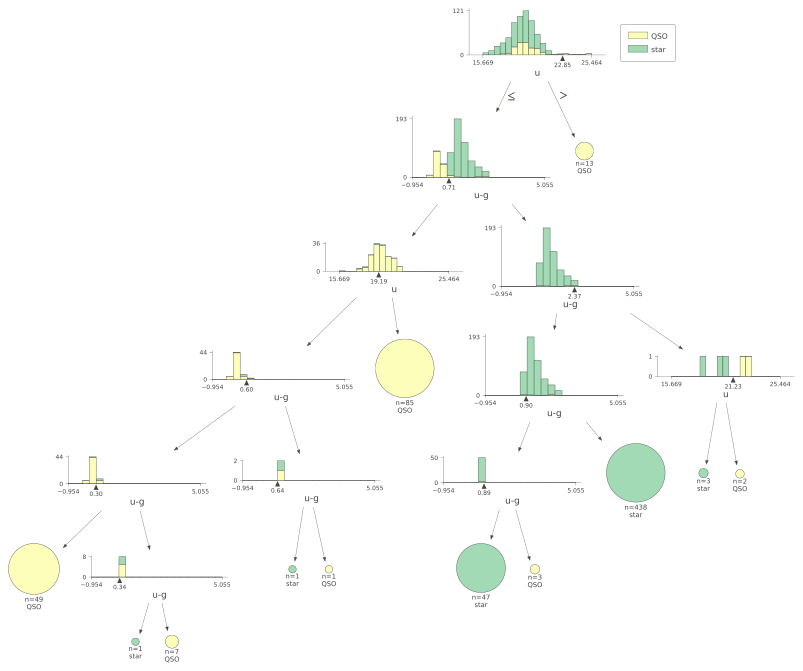

In [182]:
viz = dtreeviz(rf.estimators_[1], X_train, y_train,
               feature_names=X.columns,
               class_names=["QSO", "star"])

viz

## **Applying the model**

Pick an object from simbad:



In [192]:
u = 14.77
g = 12.78

clf.predict(np.array([u-g, g]).reshape(1,2))